<a href="https://colab.research.google.com/github/LingPeiYu/AaltoThesisDataAnalysis/blob/main/AaltoThesisDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression Analysis

In [23]:
#Polynomial Regression Analysis
%config Completer.use_jedi = False # enable code auto-completion
import numpy as np #import numpy to work with arrays
import pandas as pd #import pandas to manipulate the dataset
from matplotlib import pyplot as plt #import the module matplotlib.pyplot to do visulization
from sklearn.preprocessing import PolynomialFeatures,normalize,MinMaxScaler # function to generate polynomial and interaction features
from sklearn.linear_model import LinearRegression,LogisticRegression,HuberRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score # function to calculate mean squared error
from sklearn.model_selection import train_test_split

In [24]:
data=[]
data.append(pd.read_csv("2023-3-31-18-54-29.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
data.append(pd.read_csv("2023-4-1-13-06-22.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
data.append(pd.read_csv("2023-4-13-14-56-46.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
data.append(pd.read_csv("2023-4-15-16-17-13.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
data.append(pd.read_csv("2023-4-17-16-22-19.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))

#data process
for i in range(0,len(data)):
  data[i]['FailureCount']=data[i]['FailureCount']+1
  data[i]=data[i].rename(columns={'FailureCount': 'Attempt'})

TestData=data[0]
for i in range(1,len(data)):
  TestData=pd.concat([TestData,data[i]],axis=0)

# print the first 5 rows of the DataFrame 'RawData'
#print(type(TestData))
#print how many rows in the 'RawData'
#print(len(TestData))

#print(TestData)

<ipython-input-24-78f03db0514c>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data.append(pd.read_csv("2023-3-31-18-54-29.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
<ipython-input-24-78f03db0514c>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data.append(pd.read_csv("2023-4-1-13-06-22.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
<ipython-input-24-78f03db0514c>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data.append(pd.read_csv("2023-4-13-14-56-46.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False))
<ipython-input-24-78f03db0514c>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future ver

In [25]:
#TestData.columns

In [26]:
TestData=TestData.assign(KingCount=TestData['ChessGroup']//100000)
TestData=TestData.assign(QueenCount=TestData['ChessGroup']%100000//10000)
TestData=TestData.assign(RookCount=TestData['ChessGroup']%10000//1000)
TestData=TestData.assign(BishopCount=TestData['ChessGroup']%1000//100)
TestData=TestData.assign(KnightCount=TestData['ChessGroup']%100//10)
TestData=TestData.assign(PawnCount=TestData['ChessGroup']%10//1)

#print(type(TestData))

In [27]:
#TestData.columns

In [28]:
TestData=TestData[['TestIndex', 'LevelIndex', 'Width', 'Length', 
       'KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount',
       'DataPieceCount', 'TargetStep', 'StepRange(+-)', 'AIBestStep',
       'Attempt', 'SuccessStep', 'PercivedDifficulty']]
#print(TestData)

In [29]:
AIStScaler = MinMaxScaler()
AttScaler = MinMaxScaler()
SuccStscaler = MinMaxScaler()
PDiffScaler = MinMaxScaler()

#X=TestData[['AIBestStep','KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']]
#X['AIBestStep']=scaler.fit_transform(X[['AIBestStep']])
#X=X.to_numpy()
#y=TestData[['PercivedDifficulty']]
#y['PercivedDifficulty']=scaler.fit_transform(y[['PercivedDifficulty']])
#y=y.to_numpy()

#print(X)
#print(y)

#X_train, X_rem, y_train, y_rem = train_test_split(X,y,test_size=0.5,random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem,test_size=0.2,random_state=42)

lvIndexs=TestData[['LevelIndex']]
lvIndexs=np.unique(lvIndexs.to_numpy())

lv_train, lv_rem, lv_train, lv_rem = train_test_split(lvIndexs,lvIndexs,test_size=0.5,random_state=42)
lv_val, lv_test, lv_val, lv_test = train_test_split(lv_rem,lv_rem,test_size=0.2,random_state=42)

#process TestData
TestData['AIBestStep']=AIStScaler.fit_transform(TestData[['AIBestStep']])
TestData['Attempt']=AttScaler.fit_transform(TestData[['Attempt']])
TestData['SuccessStep']=SuccStscaler.fit_transform(TestData[['SuccessStep']])
TestData['PercivedDifficulty']=PDiffScaler.fit_transform(TestData[['PercivedDifficulty']])

data_train=TestData[TestData['LevelIndex'].isin(lv_train.ravel())]
data_val=TestData[TestData['LevelIndex'].isin(lv_val.ravel())]
data_test=TestData[TestData['LevelIndex'].isin(lv_test.ravel())]

print(TestData)

#Get X
X_train=data_train[['AIBestStep','KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']].to_numpy()
X_val=data_val[['AIBestStep','KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']].to_numpy()
X_test=data_test[['AIBestStep','KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']].to_numpy()

#Get Y
y_train=data_train[['PercivedDifficulty']].to_numpy()
y_val=data_val[['PercivedDifficulty']].to_numpy()
y_test=data_test[['PercivedDifficulty']].to_numpy()


    TestIndex  LevelIndex  Width  Length  KingCount  QueenCount  RookCount  \
0           0           2     10      10          0           1          0   
1           1          14     10      10          0           0          1   
2           2           9     10      10          0           0          0   
3           3          16     10      10          0           0          2   
4           4          18     10      10          0           0          2   
..        ...         ...    ...     ...        ...         ...        ...   
15         15           6     10      10          0           0          0   
16         16          13     10      10          0           0          1   
17         17           2     10      10          0           1          0   
18         18           7     10      10          0           0          0   
19         19          11     10      10          0           0          0   

    BishopCount  KnightCount  PawnCount  DataPieceCount  Target

In [30]:
tr_errors = []
val_errors = []
#Polynomial Regression
plt.figure(figsize=(8, 20))
for degree in range(1,10):
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train)
  regr=LinearRegression(fit_intercept=False)
  regr.fit(X_train_poly,y_train)
  y_pred_train = regr.predict(X_train_poly)
  tr_error = mean_squared_error(y_train, y_pred_train)
  X_val_poly = poly.fit_transform(X_val)
  y_pred_val = regr.predict(X_val_poly)
  val_error = mean_squared_error(y_val, y_pred_val)
  tr_errors.append(tr_error)
  val_errors.append(val_error)

print(tr_errors)
print(val_errors)

[0.034163338605509415, 0.031184161567936356, 0.02955555555555556, 0.029555555555555543, 0.029555555555555568, 0.029555555555555554, 0.02955555555555556, 0.029555555555555432, 0.029555555555555554]
[0.04767693855419087, 0.19441258830100078, 0.46629862373117065, 1.4070165255677096, 4.984057283239008, 18.524380820088993, 70.4627262865287, 272.05012107286313, 1061.3553327972136]


<Figure size 800x2000 with 0 Axes>

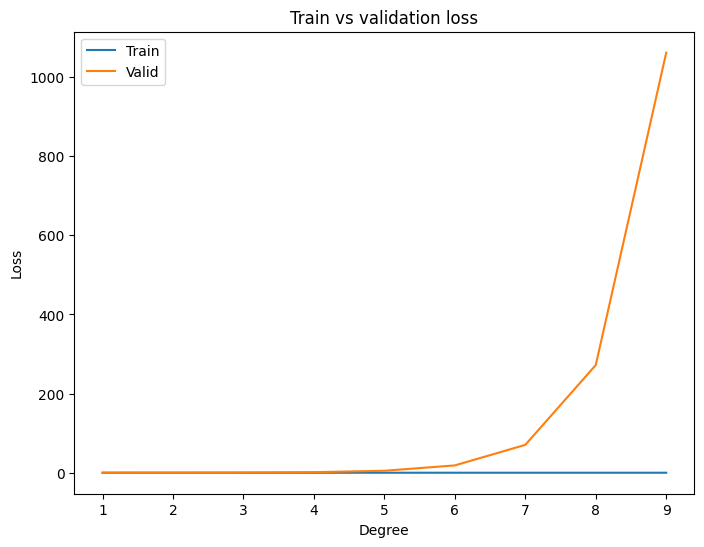

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(range(1,10), tr_errors, label = 'Train')
plt.plot(range(1,10), val_errors,label = 'Valid')
plt.legend(loc = 'upper left')
plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

In [32]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
regrPreDiff=LinearRegression(fit_intercept=False)
regrPreDiff.fit(X_train_poly, y_train)
X_test_poly = poly.fit_transform(X_test)
y_pred_test = regrPreDiff.predict(X_test_poly)
test_error = mean_squared_error(y_test, y_pred_test)
print(test_error)

0.0604596137650232


[0.0075445333189818505, 0.006877468105240182, 0.006831758034026465, 0.006831758034026465, 0.006831758034026465, 0.006831758034026465, 0.006831758034026465, 0.006831758034026466, 0.006831758034026465]
[0.036856724543313346, 0.06342028952082943, 0.041009099354687314, 0.04008611255385582, 0.039799790465994335, 0.03977546157190508, 0.04045288983359703, 0.043884683959562264, 0.0581391884545293]


<Figure size 800x2000 with 0 Axes>

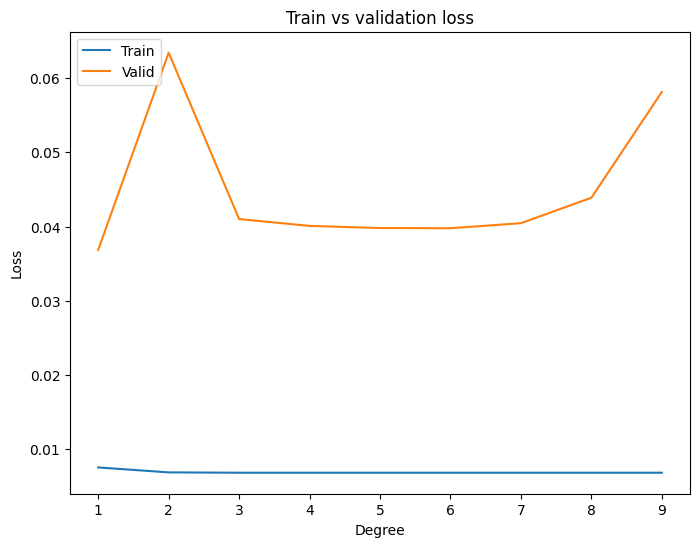

In [33]:
#Get Y
y_train=data_train[['Attempt']].to_numpy()
y_val=data_val[['Attempt']].to_numpy()
y_test=data_test[['Attempt']].to_numpy()

tr_errors = []
val_errors = []
#Polynomial Regression
plt.figure(figsize=(8, 20))
for degree in range(1,10):
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train)
  regr=LinearRegression(fit_intercept=False)
  regr.fit(X_train_poly,y_train)
  y_pred_train = regr.predict(X_train_poly)
  tr_error = mean_squared_error(y_train, y_pred_train)
  X_val_poly = poly.fit_transform(X_val)
  y_pred_val = regr.predict(X_val_poly)
  val_error = mean_squared_error(y_val, y_pred_val)
  tr_errors.append(tr_error)
  val_errors.append(val_error)

print(tr_errors)
print(val_errors)

plt.figure(figsize=(8, 6))
plt.plot(range(1,10), tr_errors, label = 'Train')
plt.plot(range(1,10), val_errors,label = 'Valid')
plt.legend(loc = 'upper left')
plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

In [34]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
regrAtt=LinearRegression(fit_intercept=False)
regrAtt.fit(X_train_poly, y_train)
X_test_poly = poly.fit_transform(X_test)
y_pred_test = regrAtt.predict(X_test_poly)
test_error = mean_squared_error(y_test, y_pred_test)
print(test_error)

0.0037733578556607777


# Correlation Analysis

In [35]:
#Corr Analysis
import seaborn as sns

In [36]:
scaler=MinMaxScaler()

In [37]:
#sort each test's values by level index
#extract player's specific data
playerData=[]
for i in range(0,len(data)):
  p='Player'+str(i)
  playerData.append(
      data[i].rename(columns={'Attempt': p+'Attempt'}).rename(columns={'SuccessStep': p+'SuccessStep'}).rename(columns={'PercivedDifficulty': p+'PercivedDifficulty'})
      [['LevelIndex',p+'Attempt',p+'SuccessStep',p+'PercivedDifficulty']]
      )
  playerData[i]=playerData[i].sort_values(by='LevelIndex',ascending=True)

#sort level data
LevelData=TestData.drop_duplicates(subset='LevelIndex').sort_values(by='LevelIndex',ascending=True)
LevelData[['AIBestStep']]=AIStScaler.inverse_transform(LevelData[['AIBestStep']])
#print(LevelData)

##AIBestStep vs SuccessStep

    AIBestStep  Player0SuccessStep  Player1SuccessStep  Player2SuccessStep  \
0     0.000000            0.064516            0.000000            0.046512   
1     0.259259            0.225806            0.977778            0.255814   
2     0.777778            0.451613            0.755556            0.232558   
3     1.000000            0.645161            0.355556            0.465116   
4     0.111111            0.000000            0.133333            0.000000   
5     0.444444            0.774194            1.000000            0.348837   
6     0.629630            0.741935            0.422222            0.348837   
7     0.962963            1.000000            0.577778            0.604651   
8     0.148148            0.193548            0.044444            0.093023   
9     0.518519            0.354839            0.577778            0.325581   
10    0.666667            0.451613            0.444444            0.325581   
11    0.962963            0.483871            0.288889          

<Axes: >

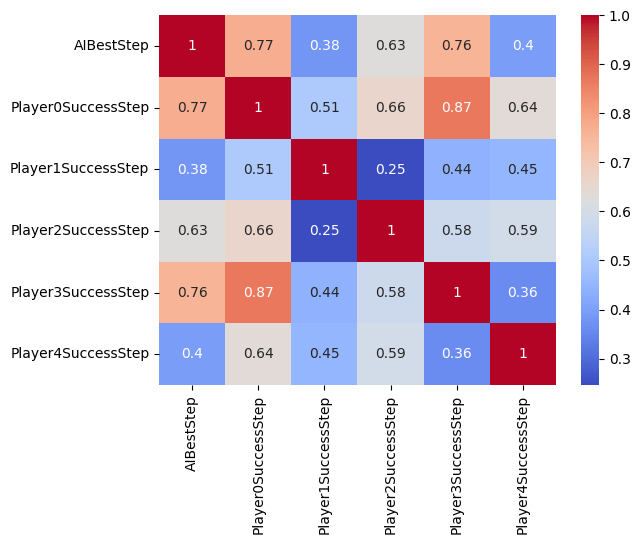

In [38]:
CorData=LevelData[['LevelIndex','AIBestStep']]
for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  CorData=pd.merge(CorData,playerData[i][['LevelIndex',playerCode+'SuccessStep']],on='LevelIndex',how='outer')

CorData.drop('LevelIndex', axis=1, inplace=True)

for i in range(0,CorData.shape[1]):
  CorData.iloc[:, i]=scaler.fit_transform(CorData.iloc[:, [i]])

print(CorData)

corr_matrix = CorData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

##AIBestStep vs PercivedDifficulty

    AIBestStep  Player0PercivedDifficulty  Player1PercivedDifficulty  \
0         15.0                          3                          2   
1         22.0                          4                          3   
2         36.0                          7                          6   
3         42.0                          7                          5   
4         18.0                          2                          4   
5         27.0                          7                          6   
6         32.0                          6                          3   
7         41.0                          7                          5   
8         19.0                          1                          1   
9         29.0                          1                          2   
10        33.0                          1                          2   
11        41.0                          2                          2   
12        19.0                          1                       

<Axes: >

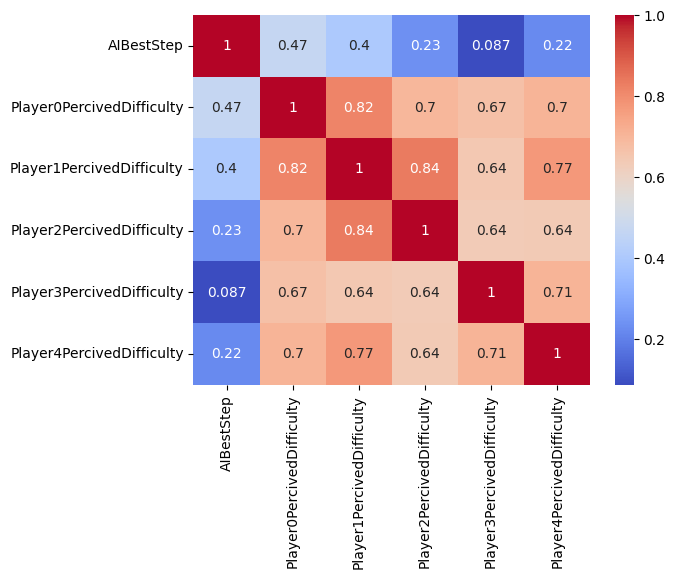

In [39]:
CorData=LevelData[['LevelIndex','AIBestStep']]
for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  CorData=pd.merge(CorData,playerData[i][['LevelIndex',playerCode+'PercivedDifficulty']],on='LevelIndex',how='outer')

CorData.drop('LevelIndex', axis=1, inplace=True)

print(CorData)

for i in range(0,CorData.shape[1]):
  CorData.iloc[:, i]=scaler.fit_transform(CorData.iloc[:, [i]])

print(CorData)

corr_matrix = CorData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

##AIBestStep vs PercivedDifficulty (average correlation in different chess pieces combination)

    AIBestStep  Player0PercivedDifficulty  Player1PercivedDifficulty  \
0         15.0                          3                          2   
1         22.0                          4                          3   
2         36.0                          7                          6   
3         42.0                          7                          5   
4         18.0                          2                          4   
5         27.0                          7                          6   
6         32.0                          6                          3   
7         41.0                          7                          5   
8         19.0                          1                          1   
9         29.0                          1                          2   
10        33.0                          1                          2   
11        41.0                          2                          2   
12        19.0                          1                       

<Axes: >

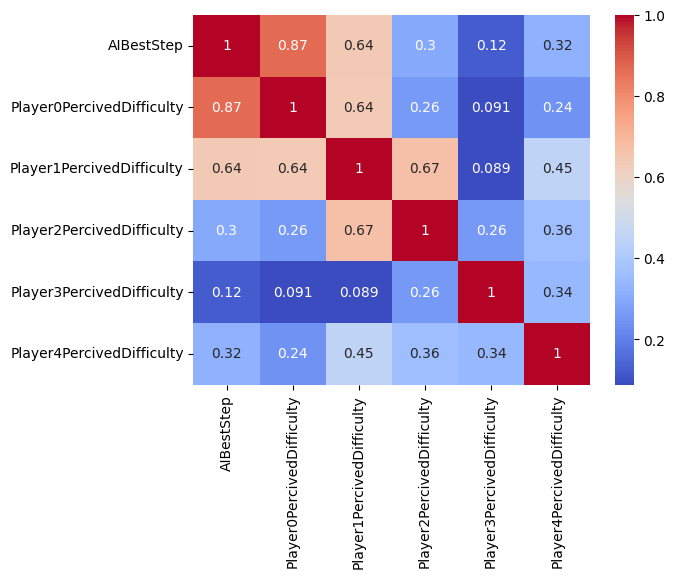

In [81]:
from numpy.ma.core import equal
CorData=LevelData[['LevelIndex','AIBestStep']]
for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  CorData=pd.merge(CorData,playerData[i][['LevelIndex',playerCode+'PercivedDifficulty']],on='LevelIndex',how='outer')

CorData.drop('LevelIndex', axis=1, inplace=True)

print(CorData)

for i in range(0,CorData.shape[1]):
  CorData.iloc[:, i]=scaler.fit_transform(CorData.iloc[:, [i]])

print(CorData)

for i in [0,4,8,12,16]:
  SubCorData=CorData.iloc[i:i+4]
  sub_corr_matrix=SubCorData.corr()
  sub_corr_matrix.fillna(0, inplace=True)
  np.fill_diagonal(sub_corr_matrix.values, 1) 

  if i == 0:
    corr_matrix = sub_corr_matrix
  else:
    corr_matrix = corr_matrix+sub_corr_matrix
  #print(SubCorData)

corr_matrix=corr_matrix/5

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

##AIBestStep vs Attempt

    AIBestStep  Player0Attempt  Player1Attempt  Player2Attempt  \
0         15.0              10               1               1   
1         22.0              12               2               1   
2         36.0              11               4               5   
3         42.0              26               9               1   
4         18.0               1               3               1   
5         27.0              47              15               2   
6         32.0              11               2               1   
7         41.0              31               5               4   
8         19.0               4               1               1   
9         29.0               1               1               2   
10        33.0               1               1               1   
11        41.0               1               1               1   
12        19.0               4               1               1   
13        26.0               1               1               2   
14        

<Axes: >

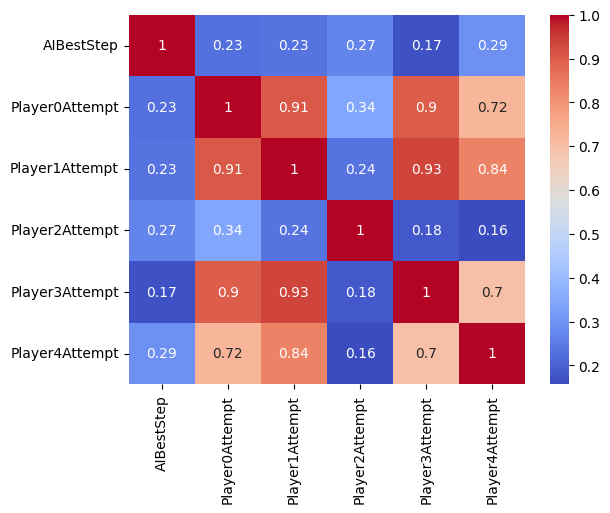

In [40]:
CorData=LevelData[['LevelIndex','AIBestStep']]
for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  CorData=pd.merge(CorData,playerData[i][['LevelIndex',playerCode+'Attempt']],on='LevelIndex',how='outer')

CorData.drop('LevelIndex', axis=1, inplace=True)

print(CorData)

for i in range(0,CorData.shape[1]):
  CorData.iloc[:, i]=scaler.fit_transform(CorData.iloc[:, [i]])

print(CorData)

corr_matrix = CorData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

##Predicted Difficulty vs Percived Difficulty

<ipython-input-41-d66a2e01a399>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['AIBestStep']]=AIStScaler.fit_transform(X[['AIBestStep']])


    PredictedDifficulty  LevelIndex
0              0.405130           0
1              0.514531           1
2              0.733333           2
3              0.827106           3
4              0.385024           4
5              0.525682           5
6              0.603826           6
7              0.744484           7
8             -0.070878           8
9              0.085409           9
10             0.147924          10
11             0.272954          11
12             0.201710          12
13             0.311111          13
14             0.420512          14
15             0.545542          15
16             0.040540          16
17             0.181198          17
18             0.259342          18
19             0.400000          19
    PredictedDifficulty  Player0PercivedDifficulty  Player1PercivedDifficulty  \
0              0.405130                   0.333333                        0.2   
1              0.514531                   0.500000                        0.4   
2

<Axes: >

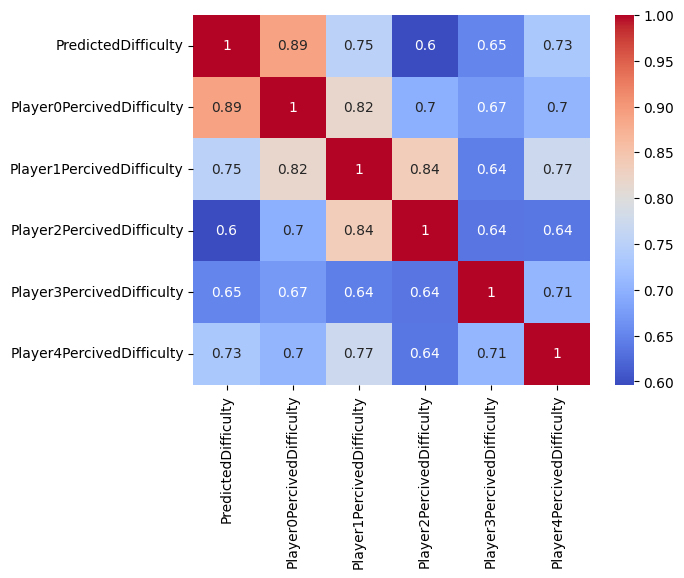

In [41]:
X=LevelData[['AIBestStep','KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']]
X[['AIBestStep']]=AIStScaler.fit_transform(X[['AIBestStep']])
X=X.to_numpy()
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)
y_pred = regrPreDiff.predict(X_poly)

CorData=pd.DataFrame(y_pred,columns=['PredictedDifficulty'])
CorData['LevelIndex']=range(0,LevelData.shape[0])
print(CorData)

for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  CorData=pd.merge(CorData,playerData[i][['LevelIndex',playerCode+'PercivedDifficulty']],on='LevelIndex',how='outer')

CorData.drop('LevelIndex', axis=1, inplace=True)

for i in range(1,CorData.shape[1]):
  CorData.iloc[:, i]=scaler.fit_transform(CorData.iloc[:, [i]])

print(CorData)

corr_matrix = CorData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

##Predicted Attempt vs Real Attempt

<ipython-input-42-bb04a5b7f51a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['AIBestStep']]=AIStScaler.fit_transform(X[['AIBestStep']])


    PredictedAttempt  LevelIndex
0          -0.010274           0
1           0.025035           1
2           0.095652           2
3           0.125917           3
4           0.026195           4
5           0.071592           5
6           0.096813           6
7           0.142210           7
8          -0.051834           8
9          -0.001393           9
10          0.018784          10
11          0.059137          11
12         -0.023714          12
13          0.011594          13
14          0.046903          14
15          0.087256          15
16         -0.089927          16
17         -0.044530          17
18         -0.019310          18
19          0.026087          19
    PredictedAttempt  Player0Attempt  Player1Attempt  Player2Attempt  \
0          -0.010274        0.195652        0.000000            0.00   
1           0.025035        0.239130        0.071429            0.00   
2           0.095652        0.217391        0.214286            1.00   
3           0.12591

<Axes: >

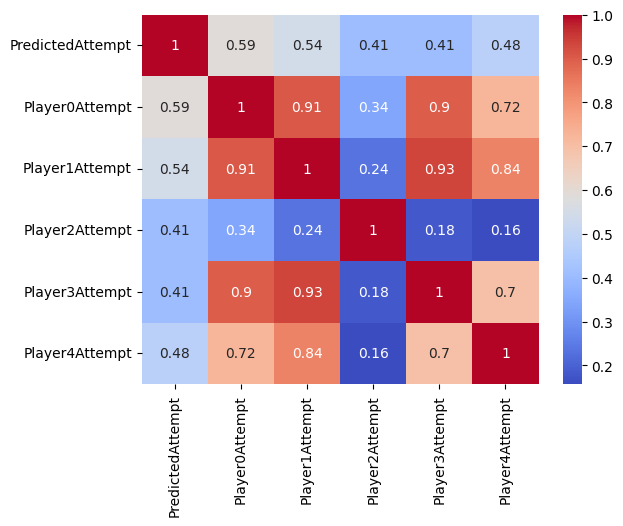

In [42]:
X=LevelData[['AIBestStep','KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']]
X[['AIBestStep']]=AIStScaler.fit_transform(X[['AIBestStep']])
X=X.to_numpy()
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)
y_pred = regrAtt.predict(X_poly)

CorData=pd.DataFrame(y_pred,columns=['PredictedAttempt'])
CorData['LevelIndex']=range(0,LevelData.shape[0])
print(CorData)

for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  CorData=pd.merge(CorData,playerData[i][['LevelIndex',playerCode+'Attempt']],on='LevelIndex',how='outer')

CorData.drop('LevelIndex', axis=1, inplace=True)

for i in range(1,CorData.shape[1]):
  CorData.iloc[:, i]=scaler.fit_transform(CorData.iloc[:, [i]])

print(CorData)

corr_matrix = CorData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Scatterplots

In [43]:
colors=['green','red','blue','pink','purple','lime']

<ipython-input-44-f29b133e40a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['AIBestStep']]=AIStScaler.fit_transform(X[['AIBestStep']])


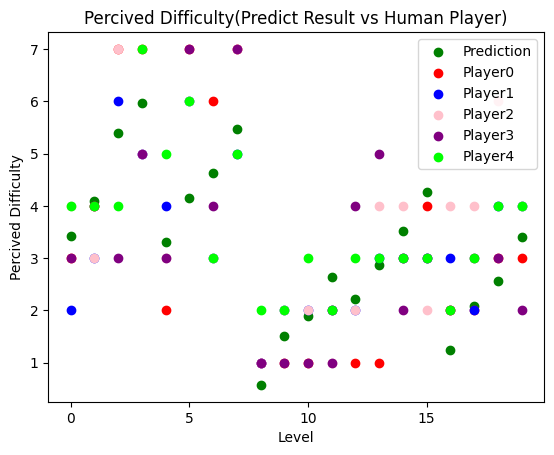

In [44]:
X=LevelData[['AIBestStep','KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']]
X[['AIBestStep']]=AIStScaler.fit_transform(X[['AIBestStep']])
X=X.to_numpy()
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)
y_pred = regrPreDiff.predict(X_poly)
y_pred=PDiffScaler.inverse_transform(y_pred)

xAxis=LevelData['LevelIndex'].to_numpy()
#print(xAxis)

plt.scatter(xAxis, y_pred, c=colors[0], label='Prediction')  # 绘制第一组散点图，并设置颜色

for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  y=playerData[i][playerCode+'PercivedDifficulty'].to_numpy()
  plt.scatter(xAxis, y, c=colors[i+1], label=playerCode)

# 创建散点图
plt.locator_params(axis='x', integer=True)
plt.locator_params(axis='y', integer=True)
plt.xlabel('Level')  # 设置横轴标签
plt.ylabel('Percived Difficulty')  # 设置纵轴标签
plt.title('Percived Difficulty(Predict Result vs Human Player)')  # 设置图标题
plt.legend()  # 显示图例
plt.show()  # 显示图形

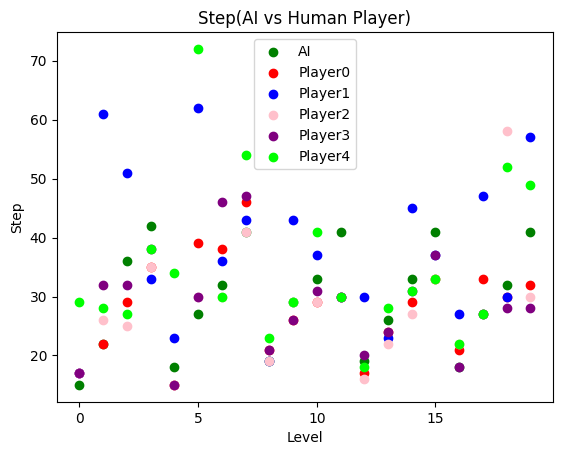

In [45]:
xAxis=LevelData['LevelIndex'].to_numpy()
#print(xAxis)

y=LevelData['AIBestStep'].to_numpy()
plt.scatter(xAxis, y, c=colors[0], label='AI')  # 绘制第一组散点图，并设置颜色

for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  y=playerData[i][playerCode+'SuccessStep'].to_numpy()
  plt.scatter(xAxis, y, c=colors[i+1], label=playerCode)

# 创建散点图
plt.locator_params(axis='x', integer=True)
plt.locator_params(axis='y', integer=True)
plt.xlabel('Level')  # 设置横轴标签
plt.ylabel('Step')  # 设置纵轴标签
plt.title('Step(AI vs Human Player)')  # 设置图标题
plt.legend()  # 显示图例
plt.show()  # 显示图形

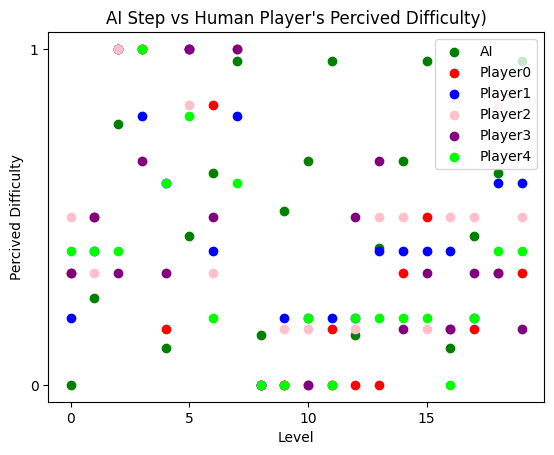

In [46]:
xAxis=LevelData['LevelIndex'].to_numpy()
#print(xAxis)

y=AIStScaler.fit_transform(LevelData[['AIBestStep']])
plt.scatter(xAxis, y, c=colors[0], label='AI')  # 绘制第一组散点图，并设置颜色

for i in range(0,len(playerData)):
  playerCode='Player'+str(i)
  y=PDiffScaler.fit_transform(playerData[i][[playerCode+'PercivedDifficulty']])
  plt.scatter(xAxis, y, c=colors[i+1], label=playerCode)

# 创建散点图
plt.locator_params(axis='x', integer=True)
plt.locator_params(axis='y', integer=True)
plt.xlabel('Level')  # 设置横轴标签
plt.ylabel('Percived Difficulty')  # 设置纵轴标签
plt.title('AI Step vs Human Player\'s Percived Difficulty)')  # 设置图标题
plt.legend()  # 显示图例
plt.show()  # 显示图形